In [ ]:
# Alta Cardinalidad y como se resuelve. Hablaste de la cantidad de valores unicos, como seria


## Replico la red neuronal de la clase pasada con Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Cargo la data

In [2]:
#Le paso el path donde ir a buscar los datos
path = '/content/train_data.csv'

#Inicializo el data frame
data = pd.read_csv(path)

data.head()

,# x1,x2,y
0,-0.128629,0.836679,0.0
1,1.380974,-0.486545,1.0
2,1.282733,0.161911,1.0
3,0.787163,-0.396736,1.0
4,2.024601,-0.521024,1.0


In [11]:
from keras.utils import to_categorical 


data_y = to_categorical(data['y'], num_classes=2)

data_y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

## Creo un dataset normalizado, otro no y hago la separacion en datos para entrenar y test.

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Creado del dataset normalizado
scaler = MinMaxScaler()
data_n = scaler.fit_transform(data.iloc[:,:-1].values)


# Separacion de ambos datasets
x_ntrain, x_ntest, yn_train, yn_test = train_test_split(data_n, data_y, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1].values, data_y, test_size=0.2)

## Modelado

In [10]:
# Carga de libs

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [48]:
model = Sequential()

model.add(Dense(2, input_dim=x_train.shape[1])) # input_dim son las variables de entrada # input + H1
model.add(Dense(3, activation='relu')) # H1
model.add(Dense(2, activation='relu')) # H2
model.add(Dense(2, activation='softmax')) # softmax necesitamos N neuronas

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 6         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Modelado con los datos sin normalizar

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=400, batch_size=32)

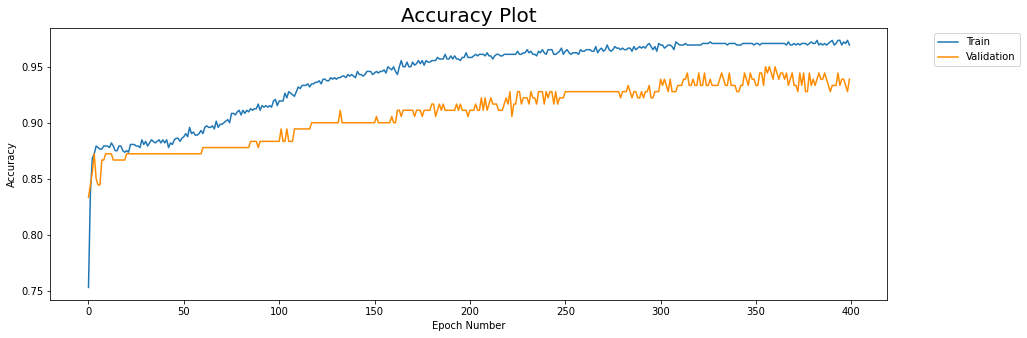

In [53]:
plt.figure(figsize=(15,5))
plt.plot(list(range(0,len(history.history['accuracy']))),history.history['accuracy'], label='Train')
plt.plot(list(range(0,len(history.history['val_accuracy']))),history.history['val_accuracy'], color='darkorange', label='Validation')
plt.title('Accuracy Plot', size=20)
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

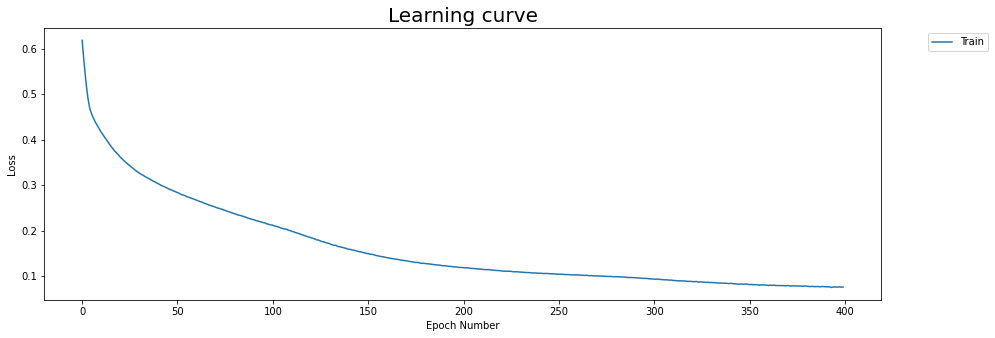

In [54]:
plt.figure(figsize=(15,5))
plt.plot(list(range(0,len(history.history['loss']))),history.history['loss'], label='Train')
plt.title('Learning curve', size=20)
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Modelado con los datos normalizados

In [41]:
model2 = Sequential()

model2.add(Dense(2, input_dim=x_train.shape[1])) # input_dim son las variables de entrada # input + H1
model2.add(Dense(3, activation='relu')) # H1
model2.add(Dense(2, activation='relu')) # H2
model2.add(Dense(2, activation='softmax')) # softmax necesitamos N neuronas

In [44]:
model2.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model2.fit(x_ntrain, yn_train, validation_data=(x_ntest, yn_test), epochs=400, batch_size=32)

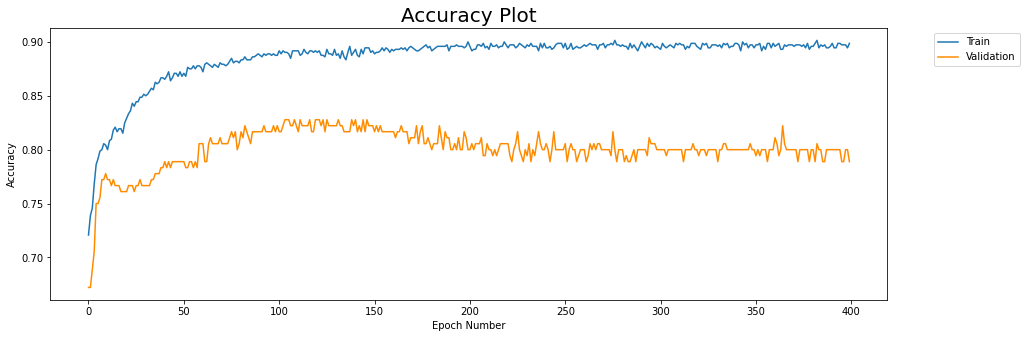

In [46]:
plt.figure(figsize=(15,5))
plt.plot(list(range(0,len(history.history['accuracy']))),history.history['accuracy'], label='Train')
plt.plot(list(range(0,len(history.history['val_accuracy']))),history.history['val_accuracy'], color='darkorange', label='Validation')
plt.title('Accuracy Plot', size=20)
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

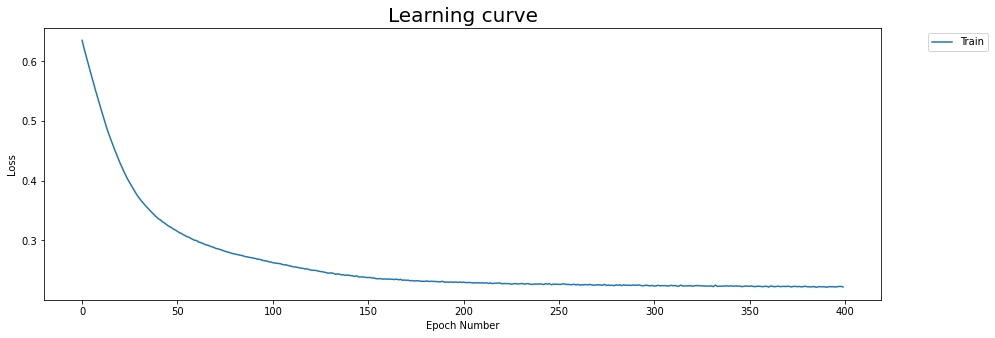

In [47]:
plt.figure(figsize=(15,5))
plt.plot(list(range(0,len(history.history['loss']))),history.history['loss'], label='Train')
plt.title('Learning curve', size=20)
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()